# Problem : Iris Flower Especies Prediction


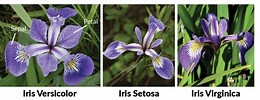


# Step0 : Problem Statement :

> Classify a new flower as belonging to one of the 3 classes given the 4 features

## Data :
> Best known database to be found in the pattern recognition literature. Data set- Iris flower data-set(Donated date1988-07-01), also known as Fisher's Iris data set and Anderson's Iris data set b/c Edgar Anderson collected the data. It is multivariate(more than 2 dependent variable) data set Study of three related Iris flowers species. Data set contain 50 sample of each species(Iris-Setosa, Iris-Virginica, IrisVersicolor).

> One class is linearly separable from the other 2; the latter are NOT linearly separable from
each other 

> Missing Attributes Values : None

> **DataSet_Source :** https://www.kaggle.com/arshid/iris-flower-dataset/download

> **Data Description:**

| Features       | description               |
| :------------- | :----------: -----------: |
| sepal_length   | Sepal length in cm        |
| sepal_width    | Sepal width in cm         |
| petal_length   | Petal length in cm        |
|petal_width     | Petal width in cm         |

## Evaluation Metrics :
> We will evaluate the performance of the model using : Accuracy, Precision  and Recall.

> + **Accuracy**

> + **Precision**  

> + **Recall**  

> Ideally, Higher accuracy values are indicative of a good model.

# Step1 : Importing Packages

In [1]:
## basic package
import pandas as pd
import numpy as np

## Visualisation packagers
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

## pkg data preparation
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

## pkg evaluation metric
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## pkg ML algorithms
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Other packages
from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
import pickle
from math import sqrt

## Customized Function
from function_utils import *

## Magic
%matplotlib inline

# Step2 : Loading the data

In [2]:
df = pd.read_csv("data/iris.csv")
print("Dataset Loaded ... ")
print("####"*20)
print("Column Names :",df.columns)
print("####"*20)
print("Dataset Shape :",df.shape)

Dataset Loaded ... 
################################################################################
Column Names : Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
################################################################################
Dataset Shape : (150, 5)


# Step3 : Exploratory Data Analysis (EDA)

## 3.1. Undertanding the Data

### 3.1.1. Firsts Rows

In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 3.1.2. Descriptive Statistics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### 3.1.3. data information

In [6]:
df.info() #df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 3.1.4. Check Missing Values

In [7]:
pd.DataFrame(df.isnull().sum()).T

,sepal_length,sepal_width,petal_length,petal_width,species
0,0,0,0,0,0


<AxesSubplot:>

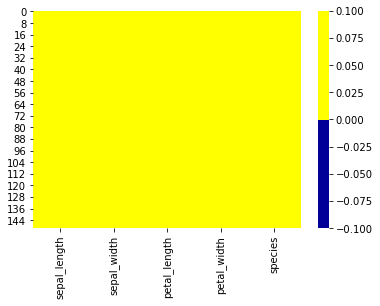

In [8]:
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### 3.1.5. Target Variable Distribution

In [9]:
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

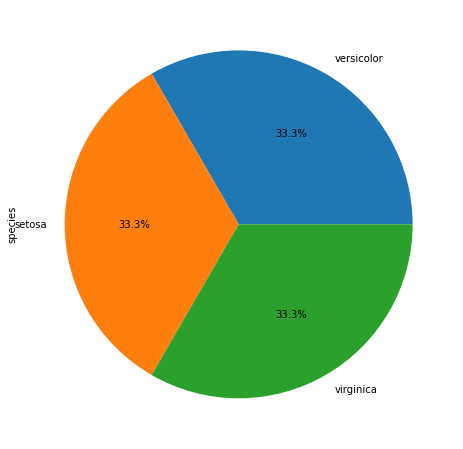

In [10]:
df.species.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()

<AxesSubplot:>

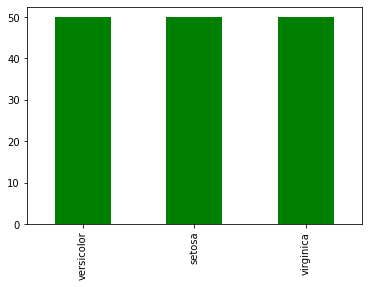

In [11]:
df.species.value_counts().plot(kind="bar",color='green')

> we see here iris data set is a balanced data set as all the 3 species( setosa, virginica, versicolor) have the number of data points is 50.

## 3.2. UNIVARIATE ANALYSIS

### 3.2.1. Check Outliers

In [12]:
iris_setosa=df.loc[df['species']=='setosa']
iris_versicolor= df.loc[df['species']=='versicolor']
iris_virginica =df.loc[df['species']=='virginica']

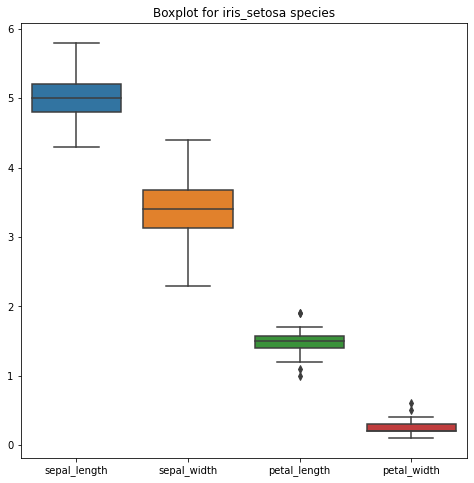

In [13]:
plt.figure(figsize=(8,8))
plt.title('Boxplot for iris_setosa species')
sns.boxplot(data=iris_setosa)
plt.show()

We can infer the below points:

1. There are outliers for petal length and petal width, so may not be sure with the pattern growth of iris flower setosa category
2. The sepal length median is maximum of all the features
3. The sepal width of some iris setosa category flowers are overlapping with the sepal length, there might be a case where iris setosa has same sepal length and width.
4. The petal growth is far lesser than sepal growth in both dimensions for thi variety

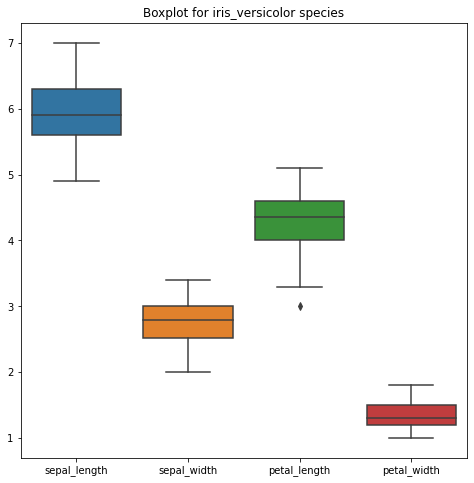

In [14]:
plt.figure(figsize=(8,8))
plt.title('Boxplot for iris_versicolor species')
sns.boxplot(data=iris_versicolor)
plt.show()

We can infer the below points for the above boxplots for iris versicolor:

1. There are outliers for petal length
2. The median of petal length is far greater then the petal width, means this variety has lesser broadness
3. The median of sepal length is far greater than the sepal width, means this variety has lesser broadness
4. There are more flowers having sepals longer than the petals in this variety

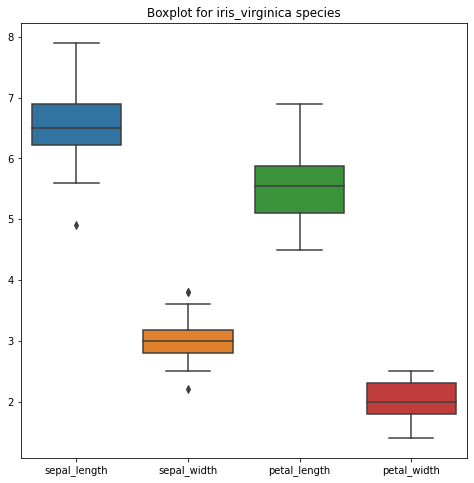

In [15]:
plt.figure(figsize=(8,8))
plt.title('Boxplot for iris_virginica species')
sns.boxplot(data=iris_virginica)
plt.show()

We can infer from the above boxplot for iris_virginica:

1. There are outliers for sepal length and sepal width, so there might be improper pattern growth for this variety.
2. The median of petal length is far greater then the petal width, means this variety has lesser broadness
3. The median of sepal length is far greater than the sepal width, means this variety has lesser broadness

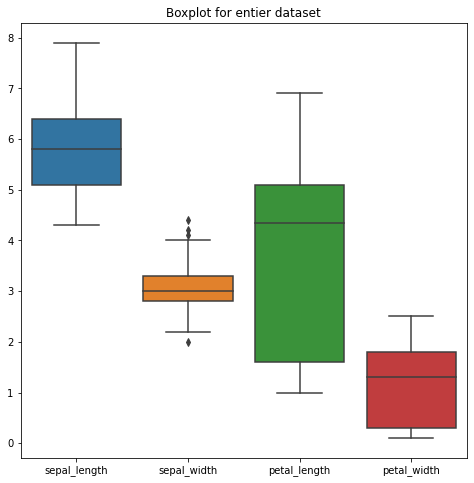

In [16]:
plt.figure(figsize=(8,8))
plt.title('Boxplot for entier dataset')
sns.boxplot(data=df)
plt.show()

Boxplot for each feature by species


C:\Users\rkies\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rkies\anaconda3\lib\si

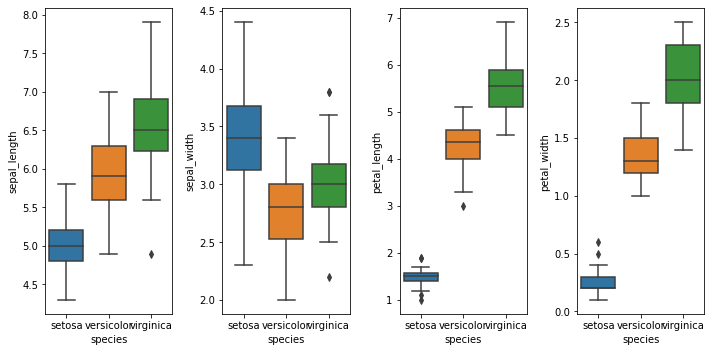

In [17]:
print('Boxplot for each feature by species')
plt.rcParams['figure.figsize'] = [10,5]
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
sns.boxplot('species', y='sepal_length', data=df, ax=ax1)
sns.boxplot('species', y='sepal_width', data=df, ax=ax2)
sns.boxplot('species', y='petal_length', data=df, ax=ax3)
sns.boxplot('species', y='petal_width', data=df, ax=ax4)

f.tight_layout()


1. Setosa spece still easily distiguishible sauf dans le cas de sepal width ou il overlap with other species.

2. versicolor and virginica overlap thtough out every feature

### 3.2.2. Check Feature bevior in each class

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

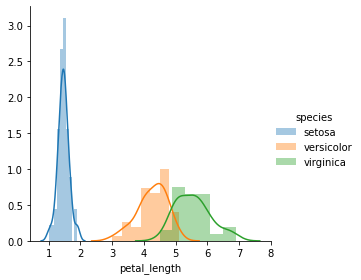

In [18]:
sns.FacetGrid(df,hue="species",height=4).map(sns.distplot,"petal_length").add_legend();

we see that on the basis of petal length setosa is separable while the other two are overlapping

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

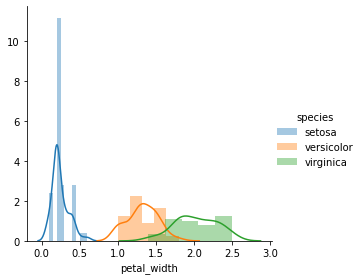

In [19]:
sns.FacetGrid(df,hue="species",height=4).map(sns.distplot,"petal_width").add_legend();

We see the setosa is easily separable while some portions of Versicolor and virginica are mixed for the petal_width.

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

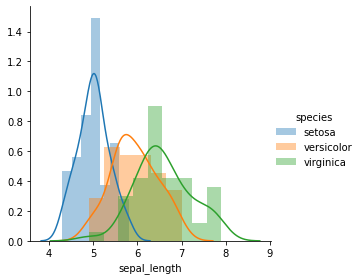

In [20]:
sns.FacetGrid(df,hue="species",height=4).map(sns.distplot,"sepal_length").add_legend();

We see it is quite tough to separate the species on the basis of sepal_length alone.

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

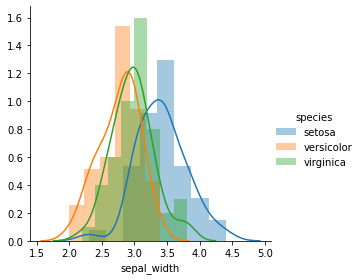

In [21]:
sns.FacetGrid(df,hue="species",height=4).map(sns.distplot,"sepal_width").add_legend();

While the overlapping of species is more intense in the case of sepal_width.

### 3.2.3. Check Variables Distribution

C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rkies\anaconda3\lib\site-packages\seaborn\distr

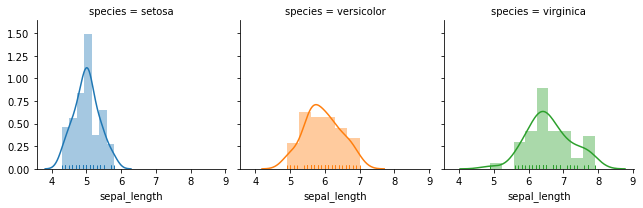

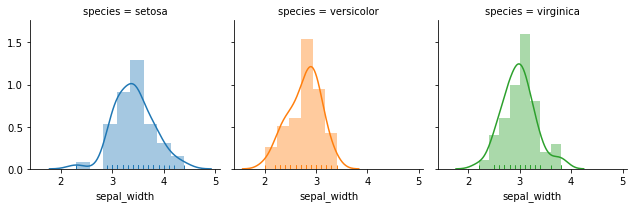

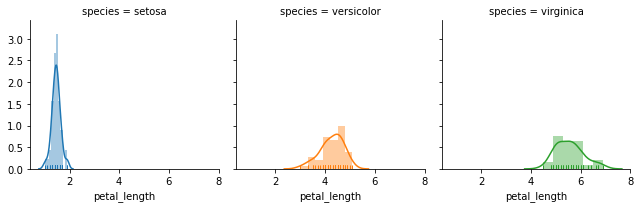

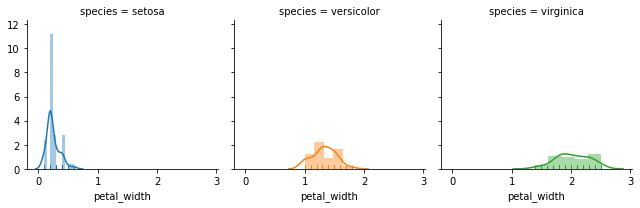

In [22]:
g = sns.FacetGrid(df, col='species', hue='species')
g.map(sns.distplot, "sepal_length", hist=True, rug=True)

g = sns.FacetGrid(df, col='species', hue='species')
g.map(sns.distplot, "sepal_width", hist=True, rug=True)

g = sns.FacetGrid(df, col='species', hue='species')
g.map(sns.distplot, "petal_length", hist=True, rug=True)

g = sns.FacetGrid(df, col='species', hue='species')
g.map(sns.distplot, "petal_width", hist=True, rug=True)



> Most of the variable are normally distributed 

## 3.3. Bi Variate Analysis

### 3.3.1. Check Correlation

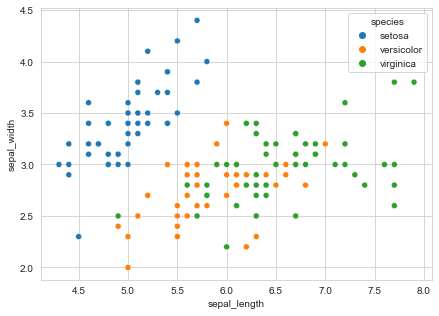

In [23]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x=df['sepal_length'], y=df['sepal_width'], hue='species')
plt.show()

Using sepal length and width, the setosa variety is easily distinguishable. We see that the versicolor and virginica are overlapping, so harder to distinguish.

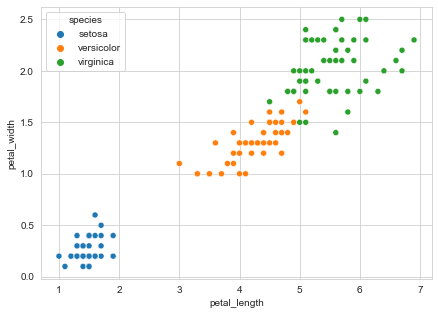

In [24]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x=df['petal_length'], y=df['petal_width'], hue='species')
plt.show()

Using petal length and width, the setosa variety is easily distinguishable. We see that the versicolor and virginica are overlapping, so harder to distinguish.

<Figure size 504x360 with 0 Axes>

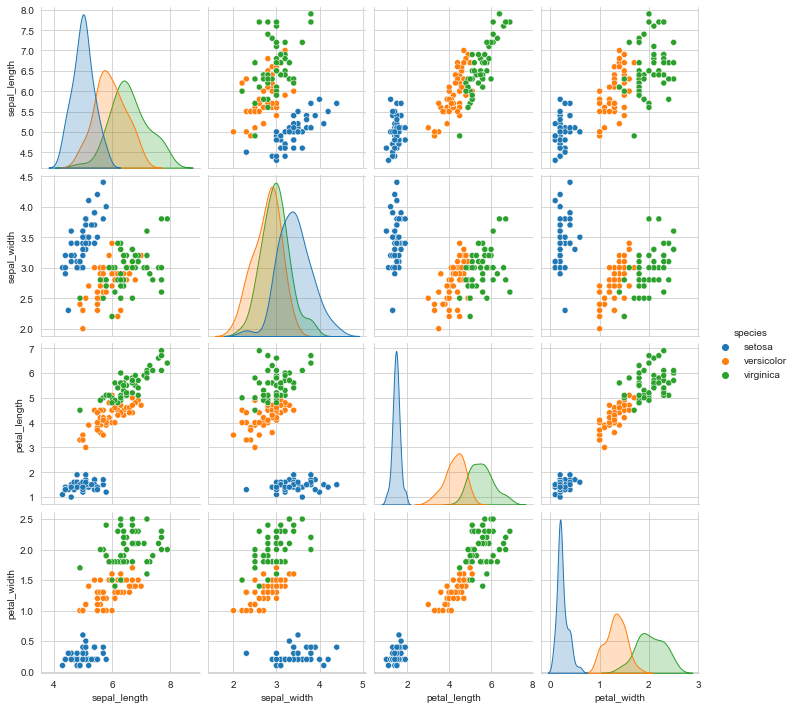

In [25]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='species')
plt.show()

Inference

1. we cans see petal_length and petal_width are more useful features to identify flower types.
2. setosa can easily separable,but virginica and versicolor have some overlap

### 3.3.2. Check Correlation indice

<AxesSubplot:>

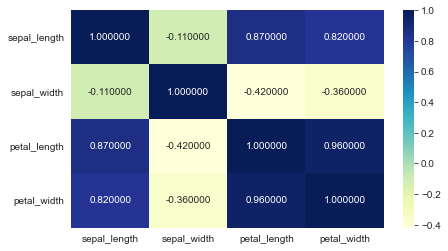

In [26]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(7,4))
sns.heatmap(data=correlation_matrix, annot=True, fmt="f",cmap="YlGnBu")

In [27]:
df.species = df.species.astype('category')
X = df.drop('species', axis=1)
y = df['species']

## 3.4. Multi Variate Analysis

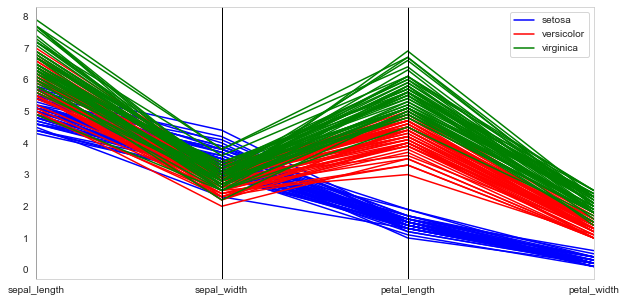

In [28]:
parallel_coordinates(df, "species", color = ['blue', 'red', 'green']);

Observing above parallel coordinate plot we can confirm that petal measurements can separate species better than the sepal ones.

### 3.5. GUI Data Exploration with pandas profiling

In [29]:
profile = ProfileReport(df, title='Iris Flower Dataset')
#Method to view in notebook
profile.to_notebook_iframe()

## Select numeric and non-numeric data

#### select numeric columns

In [30]:
df_num = df.select_dtypes(include=[np.number])
num_cols = df_num.columns.values
print(num_cols)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


#### select non numeric columns

In [31]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['species']


# Step4 : Data Preparation

### 4.1. Separate features - Target 

In [32]:
X = df.drop('species',axis=1)
y = df.species

In [33]:
# Normalization
df_norm = (X - X.mean())/(X.max() - X.min())
df_norm = pd.concat([df_norm, y], axis=1)

### => Before Normalization

In [34]:
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### => After Normalization

In [35]:
df_norm.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.206481,0.185833,-0.399774,-0.416111,setosa
1,-0.262037,-0.022500,-0.399774,-0.416111,setosa
2,-0.317593,0.060833,-0.416723,-0.416111,setosa


#### Separate features - Target

In [36]:

X_norm = df_norm.drop(labels='species', axis=1)
y_norm = df_norm['species']
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.206481,0.185833,-0.399774,-0.416111
1,-0.262037,-0.022500,-0.399774,-0.416111
2,-0.317593,0.060833,-0.416723,-0.416111
3,-0.345370,0.019167,-0.382825,-0.416111
4,-0.234259,0.227500,-0.399774,-0.416111


### 4.2. Label Encoding for categorical feature

In [37]:
df_norm['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [38]:
le = LabelEncoder()
le.fit(df_norm['species'])
le.transform(df_norm['species'])
y_norm = pd.DataFrame(y_norm)

In [39]:
y_norm.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### 4.2. Split dataset into training and testing set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


# Step5 : Build and Train the model

### => Moddels Selection

In [42]:
models = [
    #(algo_name, algoritm),
    ("GNB", GaussianNB() ),
    ("DT", DecisionTreeClassifier()),
    ("RF", RandomForestClassifier()),
    ("SVC", SVC()),
    ("KNN", KNeighborsClassifier())
]

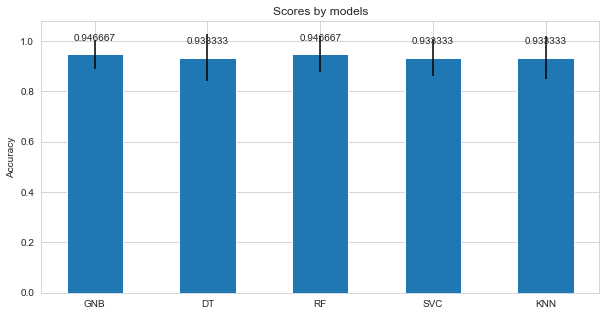

,Algo_name,Accuracy Mean,Accuracy Standard Dev.
0,GNB,0.946667,0.058119
1,DT,0.933333,0.094281
2,RF,0.946667,0.071802
3,SVC,0.933333,0.073030
4,KNN,0.933333,0.084327


In [43]:
select_model(models,X, y)

### => Decision Tree

In [44]:
X = X_train
y = y_train
algo_name = 'DTree'
algorithm = DecisionTreeClassifier()
gridsearchParams = {'max_depth': [3,4,5,6,7,8,9,10,11],
                   'random_state' : [1,2,3,4,5]}

cv = 5

In [45]:
pred = clf_m_train_cv(X, y, algo_name, algorithm, gridsearchParams, cv)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    0.4s finished


Best Params :  {'max_depth': 4, 'random_state': 1} 
Classification Report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23
 
Accuracy Score train : 0.9887640449438202
Accuracy Score test  : 0.9565217391304348 
Confusion Matrix : 
 [[9 0 0]
 [0 7 0]
 [0 1 6]] 
Prediction :


In [46]:
pred.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Actual,virginica,setosa,versicolor,virginica,versicolor,setosa,versicolor,virginica,versicolor,setosa,...,versicolor,virginica,setosa,setosa,setosa,virginica,versicolor,setosa,versicolor,setosa
Predicted,versicolor,setosa,versicolor,virginica,versicolor,setosa,versicolor,virginica,versicolor,setosa,...,versicolor,virginica,setosa,setosa,setosa,virginica,versicolor,setosa,versicolor,setosa


In [47]:
X = X_train
y = y_train
algo_name = 'DTree'
algorithm = DecisionTreeClassifier(max_depth=4, random_state=1)

In [48]:
model, pred = clf_m_tain(X, y,algo_name,  algorithm)

Classification Report :               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23
 
Accuracy Score train : 0.9887640449438202
Accuracy Score test  : 0.9565217391304348 
Confusion Matrix : 
 [[9 0 0]
 [0 7 0]
 [0 1 6]] 
Prediction :


# step6 : Model prediction and Evaluation

In [49]:
pred.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Actual,virginica,setosa,versicolor,virginica,versicolor,setosa,versicolor,virginica,versicolor,setosa,...,versicolor,virginica,setosa,setosa,setosa,virginica,versicolor,setosa,versicolor,setosa
Predicted,versicolor,setosa,versicolor,virginica,versicolor,setosa,versicolor,virginica,versicolor,setosa,...,versicolor,virginica,setosa,setosa,setosa,virginica,versicolor,setosa,versicolor,setosa


In [50]:
loaded_model = pickle.load(open('models/DTree98.88.pkl', 'rb'))

### => Feature Importance

Feature Ranking :


,Features Name,Ranking Score,%
0,sepal_length,0.951445,95.14
1,sepal_width,0.033298,3.33
2,petal_length,0.015257,1.53
3,petal_width,0.000000,0.00


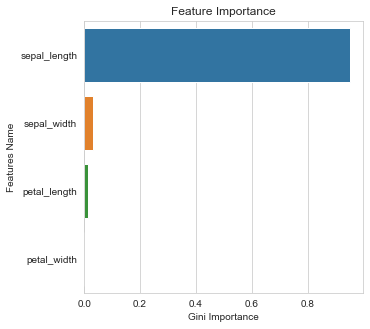

In [51]:
#from train_model import *
feature_imp(X, loaded_model)

### => visiualize the classification rules

In [52]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']

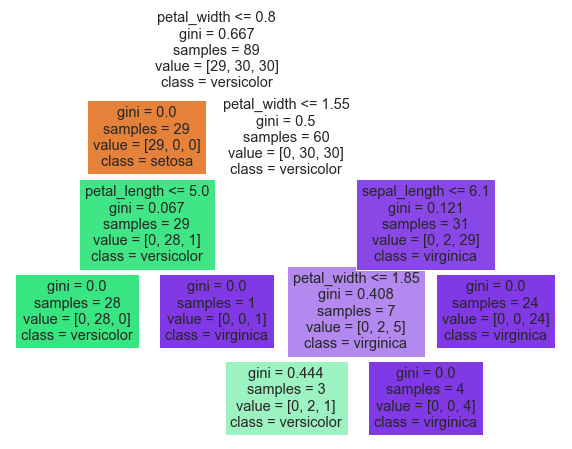

In [53]:
plt.figure(figsize = (10,8))
plot_tree(loaded_model, feature_names = fn, class_names = cn, filled = True);

# Step7 : Model Improvement

- Feature Engeneering 
- Feature Selection
- hyperparameters tuning
- techniques for dimensionality reduction.

# Step8 : Model Deployment

In [54]:
prediction()

============WELCOME TO=============
    Iris Flower Classification     
 
Please Enter Predictor variables
--------------------------------
Enter sepal length : 5
Enter sepal width  : 3
Enter petal length : 3
Enter petal width  : 6
--------------------------------

Iris Classified as : ['virginica']
============THANK YOU=============


#########################################################################
+ https://towardsdatascience.com/creating-the-whole-machine-learning-pipeline-with-pycaret-db39a3006840